**K-Means Clustering in Python with scikit-learn**
The training set contains several records about the passengers of Titanic (hence the name of the dataset). It has 12 features capturing information about passenger_class, port_of_Embarkation, passenger_fare etc. The dataset's label is survival which denotes the survivial status of a particular passenger. Your task is to cluster the records into two i.e. the ones who survived and the ones who did not.
Drop the 'survival' column from the dataset and make it unlabeled. It's the task of K-Means to cluster the records of the datasets if they survived or not.
 you will need the following Python packages: pandas, NumPy, scikit-learn, Seaborn and Matplotlib.


In [1]:
"""
================================
             Kmeans
================================


*************************************************************************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!       /!\ DOES NOT WORK /!\         !!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*************************************************************************************


Sample usage of Kmeans clustering.
This notebook is all about finding the best tuning with the Kmeans model,
for predicting activities types in function of acceleration measurements.

It will plot the decision boundaries for each class.
"""
print(__doc__)


             Kmeans

Sample usage of Kmeans clustering.
This notebook is all about finding the best tuning with the Kmeans model,
for predicting activities types in function of acceleration measurements.

It will plot the decision boundaries for each class.



In [2]:
# Import statements
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import data into a dataframe
CSV_PATH = '../data/cleaned_data/full_with_act_1_transitory_regimes_cleaned.csv'
X = pd.read_csv(CSV_PATH,header=None,delimiter=',',usecols=[1, 2, 3, 4]).astype(int)
X.head()

1     2     3  4
0  1940  2368  2151  1
1  1936  2371  2153  1
2  1939  2379  2154  1
3  1943  2379  2154  1
4  1942  2363  2157  1

In [4]:

# Create train and test datasets as dataframes
import random
from sklearn.model_selection import train_test_split
train, test = train_test_split(X,test_size=0.3,random_state=3) # random seed set to a fix value

In [5]:
# Check whether data is well imported
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
           1     2     3  4
95067   1889  2383  2023  7
96620   1920  2379  1984  7
107743  1905  2383  1972  7
96016   1912  2402  2011  7
78688   1939  2411  1995  7


***** Test_Set *****
           1     2     3  4
107906  1906  2384  1974  7
50371   1895  2400  2131  4
68139   1955  2558  2204  5
107950  1909  2386  1977  7
21207   1976  2376  2120  1


In [6]:
# Initial statistics of both the train and test DataFrames using pandas' describe() method.
print(train.columns.values)

print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

[1 2 3 4]
***** Train_Set *****
                   1              2              3              4
count  112296.000000  112296.000000  112296.000000  112296.000000
mean     1910.400379    2380.664191    2040.343512       4.954353
std        39.331786      41.033886      58.754516       2.396693
min      1656.000000    2158.000000    1830.000000       1.000000
25%      1886.000000    2374.000000    1991.000000       3.000000
50%      1905.000000    2381.000000    2021.000000       7.000000
75%      1933.000000    2386.000000    2099.000000       7.000000
max      2143.000000    2713.000000    2377.000000       7.000000


***** Test_Set *****
                  1             2             3             4
count  48128.000000  48128.000000  48128.000000  48128.000000
mean    1910.691946   2380.715696   2040.514295      4.940430
std       39.408249     41.009358     59.037392      2.403455
min     1624.000000   2110.000000   1856.000000      1.000000
25%     1886.000000   2374.000000   1991.

In [7]:
# Analyze missing values in the datasets

# where are they ?
# For the train set

train.isna().head()

# For the test set

test.isna().head()

# Their numbers
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())


*****In the train set*****
1    0
2    0
3    0
4    0
dtype: int64


*****In the test set*****
1    0
2    0
3    0
4    0
dtype: int64


In [8]:
# Missing values imputation 

# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

# Check if that's ok
print(train.isna().sum())

# Still missing values for categorical variables

1    0
2    0
3    0
4    0
dtype: int64


In [9]:
train[[1,2,3]]

1     2     3
95067   1889  2383  2023
96620   1920  2379  1984
107743  1905  2383  1972
96016   1912  2402  2011
78688   1939  2411  1995
...      ...   ...   ...
156437  1924  2385  2063
104704  1908  2391  1994
48056   1871  2293  1997
77049   1883  2380  2011
71530   1902  2383  2019

[112296 rows x 3 columns]

In [10]:
# Check mean accelerations in (x, y, z) according to activity type

train[[1,2,3,4]].groupby([4], as_index=False).mean().sort_values(by=4, ascending=False)



4            1            2            3
6  7  1900.433446  2382.892661  2008.519617
5  6  1887.341216  2383.054537  2032.355212
4  5  1916.939421  2373.625835  2102.567483
3  4  1884.206167  2380.607850  2051.139540
2  3  1893.155043  2383.043351  2010.842407
1  2  1890.792424  2375.230303  2067.253030
0  1  1967.510942  2374.584082  2120.022292

In [11]:
# Check standard deviation accelerations in (x, y, z) according to activity type

train[[1,2,3,4]].groupby([4], as_index=False).std().sort_values(by=4, ascending=False)

4          1          2          3
6  7  20.443917   9.158341  39.522031
5  6  46.125434  78.489251  58.816209
4  5  49.977730  87.864022  74.981355
3  4  45.734007  88.268929  48.605945
2  3  19.729184  23.341453  33.251139
1  2  33.145620  48.086369  47.815254
0  1   9.048418   5.653228  13.670047

In [12]:
#  By Pclass
for k in range(1,4):
    train[[k, 4]].groupby([4], as_index=False).mean().sort_values(by=k, ascending=False)

print(train)

           1     2     3  4
95067   1889  2383  2023  7
96620   1920  2379  1984  7
107743  1905  2383  1972  7
96016   1912  2402  2011  7
78688   1939  2411  1995  7
...      ...   ...   ... ..
156437  1924  2385  2063  7
104704  1908  2391  1994  7
48056   1871  2293  1997  4
77049   1883  2380  2011  7
71530   1902  2383  2019  3

[112296 rows x 4 columns]


KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

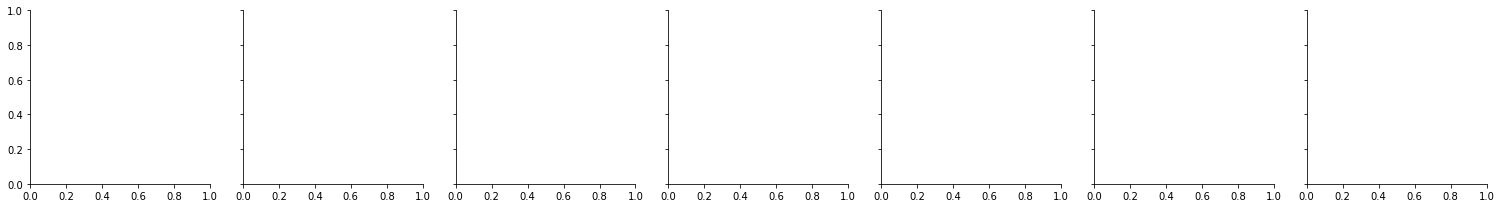

In [13]:
# Some Graphics
g = sns.FacetGrid(train, col=4)
for k in range(0,4):
    g.map(plt.hist, k, bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


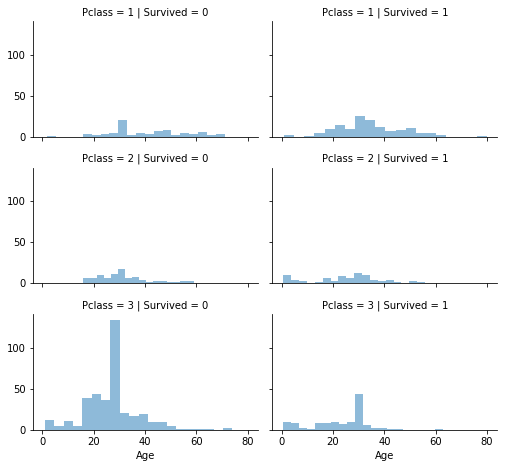

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Preprocessing data set for kmeans

In [ ]:
train.info()
# You can see that Name, Sex, Ticket, Cabin, Embarked are not numerical
# We drop all of them except Sex that we convert to numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113750 entries, 15223 to 71530
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   1       113750 non-null  int64
 1   2       113750 non-null  int64
 2   3       113750 non-null  int64
 3   4       113750 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB


In [ ]:
DD = train.drop(['Name','Ticket', 'Cabin','Embarked','PassengerId'], axis=1)
DD2 = test.drop(['Name','Ticket', 'Cabin','Embarked','PassengerId'], axis=1)


labelEncoder = LabelEncoder()
labelEncoder.fit(DD['Sex'])
labelEncoder.fit(DD2['Sex'])
DD['Sex'] = labelEncoder.transform(DD['Sex'])
DD2['Sex'] = labelEncoder.transform(DD2['Sex'])


In [ ]:
# You can first drop the Survival column from the data with the drop() function.
X = np.array(DD.drop(['Survived'], 1).astype(float))
y = np.array(DD['Survived'])
print(X.shape)

(891, 6)


In [ ]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X)) 

In [ ]:
km = KMeans(n_clusters=2) 
# You want cluster the passenger records into 2and check if they correspond to  Survived or Not survived
km.fit(X)
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

**TODO**
You can compare kmeans labelling with the survival status
* Look at the confusion matrix using confusion_matrix() from sklearn.metrics
* You can compute the adjusted_rand_score() from sklearn.metrics.cluster import 
* Does scaling affect the result ? use a scaling approach like MinMaxScaler()